<a href="https://colab.research.google.com/github/royn5618/Deep-Learning-Things/blob/main/Computer%20Vision/Car_Damage_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## VGG 16

* Trained on ILSVR (ImageNet)
* VGG 16 - based on CNN architecture
* Model calculates the probablity between 0 to 1 for each label
* Choose the category with the highest probabality

## VGG 16 Architecture

16 layers with learnable weights

{conv1 conv2 pooling} x 2
{conv1 conv2 conv3 pooling} x 3
{dense} x 3

Thus, 13 conv layers - 4 + 9 = 13 


## Transfer Learning

Instead creating a model from scratch, utilize the weights of a pre-trained model.
-saves infrastructural expenses
-saves time
The learning is transfered.


In [2]:
import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications.imagenet_utils import preprocess_input
# from keras.applications.vgg16 import preprocess_input

In [3]:
model = VGG16(weights='imagenet')

553467904/553467096 [==============================] - 5s 0us/step


In [4]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [5]:
def prep_image(img_path):
    img = load_img(img_path, target_size=(224, 224))
    x = img_to_array(img)
    x = np.expand_dims(
        x, axis=0
    )  # image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # print(x.shape)
    x = preprocess_input(x)
    return x

In [6]:
test_img_path = '/content/drive/My Drive/London/IMG_20190720_084522.jpg'

In [9]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

prepped_image = prep_image(test_img_path)

Mounted at /content/drive


In [10]:
model.predict(prepped_image)

array([[1.75596517e-06, 2.82088749e-05, 4.96335588e-06, 6.93378126e-07,
        3.88206763e-06, 1.52600910e-06, 3.99908367e-06, 4.06544532e-05,
        1.16636920e-05, 1.14349004e-05, 4.13022144e-06, 6.95118524e-06,
        1.65451802e-05, 4.51934648e-06, 3.12262855e-05, 3.78702061e-05,
        9.91384968e-06, 2.07771991e-05, 3.65055166e-05, 2.98128293e-06,
        7.86452074e-06, 4.96385792e-06, 2.74156264e-05, 5.50015939e-05,
        2.93120629e-05, 6.15233876e-06, 3.98692509e-06, 3.17942213e-05,
        2.98962755e-06, 1.97409827e-06, 1.00680400e-05, 9.86449686e-06,
        6.19932689e-06, 1.32543528e-06, 1.23321081e-06, 2.75051502e-06,
        1.46355478e-05, 7.50449226e-06, 6.13095426e-06, 2.16525907e-04,
        4.94102424e-05, 1.00702100e-05, 1.20785026e-05, 1.94572181e-06,
        6.25471584e-05, 1.06792650e-05, 7.30465836e-05, 7.40607866e-05,
        1.07454352e-05, 4.89295562e-05, 4.91511455e-05, 5.09029560e-05,
        1.04224682e-06, 2.46720629e-06, 5.48057415e-06, 1.992236

In [11]:
probabilities = model.predict(prepped_image)

In [12]:
probabilities.shape

(1, 1000)

In [13]:
# Return a tuple (class_name, class_description, score)
decode_predictions(probabilities, top=5)

40960/35363 [==================================] - 0s 0us/step


[[('n03733281', 'maze', 0.17897579),
  ('n03877845', 'palace', 0.1490828),
  ('n02980441', 'castle', 0.073020756),
  ('n02894605', 'breakwater', 0.0533212),
  ('n03781244', 'monastery', 0.04707954)]]

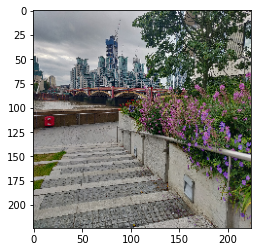

In [14]:
img = load_img(test_img_path, target_size=(224, 224))
plt.imshow(img)

In [18]:
!wget http://ai.stanford.edu/~jkrause/car196/cars_train.tgz

--2021-06-04 23:09:55--  http://ai.stanford.edu/~jkrause/car196/cars_train.tgz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 979269282 (934M) [application/x-gzip]
Saving to: ‘cars_train.tgz’

cars_train.tgz      100%[===================>] 933.90M  98.8MB/s    in 9.5s    

2021-06-04 23:10:04 (98.0 MB/s) - ‘cars_train.tgz’ saved [979269282/979269282]



In [19]:
!tar -xvzf cars_train.tgz

Streaming output truncated to the last 5000 lines.
cars_train/03145.jpg
cars_train/03146.jpg
cars_train/03147.jpg
cars_train/03148.jpg
cars_train/03149.jpg
cars_train/03150.jpg
cars_train/03151.jpg
cars_train/03152.jpg
cars_train/03153.jpg
cars_train/03154.jpg
cars_train/03155.jpg
cars_train/03156.jpg
cars_train/03157.jpg
cars_train/03158.jpg
cars_train/03159.jpg
cars_train/03160.jpg
cars_train/03161.jpg
cars_train/03162.jpg
cars_train/03163.jpg
cars_train/03164.jpg
cars_train/03165.jpg
cars_train/03166.jpg
cars_train/03167.jpg
cars_train/03168.jpg
cars_train/03169.jpg
cars_train/03170.jpg
cars_train/03171.jpg
cars_train/03172.jpg
cars_train/03173.jpg
cars_train/03174.jpg
cars_train/03175.jpg
cars_train/03176.jpg
cars_train/03177.jpg
cars_train/03178.jpg
cars_train/03179.jpg
cars_train/03180.jpg
cars_train/03181.jpg
cars_train/03182.jpg
cars_train/03183.jpg
cars_train/03184.jpg
cars_train/03185.jpg
cars_train/03186.jpg
cars_train/03187.jpg
cars_train/03188.jpg
cars_train/03189.jpg
cars

In [20]:
import os
all_car_images=os.listdir('cars_train')

In [21]:
train_folder_path = 'cars_train'

In [22]:
all_car_images[:5]

['06786.jpg', '00191.jpg', '03491.jpg', '00910.jpg', '04786.jpg']

In [24]:
from collections import Counter, defaultdict


def get_car_labels(img_train_directory):
    counter_car_vgg_labels_dict = defaultdict(float)
    all_car_images = os.listdir(img_train_directory)
    for i, car_image in enumerate(all_car_images):
        img = prep_image(img_train_directory + '/' + car_image)
        label_probabilities = model.predict(img)
        get_top_predition_labels = decode_predictions(label_probabilities,
                                                      top=5)
        for each_top_label in get_top_predition_labels[0]:
            counter_car_vgg_labels_dict[
                each_top_label[0:2]] += each_top_label[2]
    return Counter(counter_car_vgg_labels_dict)

In [25]:
car_counter = get_car_labels(train_folder_path)

In [26]:
car_counter

Counter({('n01665541', 'leatherback_turtle'): 0.21518797520548105,
         ('n01697457', 'African_crocodile'): 0.0012382935965433717,
         ('n02086079', 'Pekinese'): 0.033954132348299026,
         ('n02104365', 'schipperke'): 0.05452005937695503,
         ('n02105855', 'Shetland_sheepdog'): 0.23521046340465546,
         ('n02117135', 'hyena'): 0.04782101884484291,
         ('n02129165', 'lion'): 0.10999877750873566,
         ('n02410509', 'bison'): 0.062146732583642006,
         ('n02415577', 'bighorn'): 0.004000765737146139,
         ('n02437312', 'Arabian_camel'): 0.04679043963551521,
         ('n02486410', 'baboon'): 0.23613604065030813,
         ('n02510455', 'giant_panda'): 0.09454882144927979,
         ('n02687172', 'aircraft_carrier'): 0.09582147002220154,
         ('n02690373', 'airliner'): 0.15054942667484283,
         ('n02692877', 'airship'): 0.28224706649780273,
         ('n02699494', 'altar'): 0.044917330145835876,
         ('n02701002', 'ambulance'): 39.5286851524724

In [27]:
cat_list  = [k for k, v in car_counter.most_common()[:27]]

In [28]:
cat_list

[('n04285008', 'sports_car'),
 ('n03770679', 'minivan'),
 ('n03100240', 'convertible'),
 ('n03930630', 'pickup'),
 ('n02814533', 'beach_wagon'),
 ('n04037443', 'racer'),
 ('n03670208', 'limousine'),
 ('n03594945', 'jeep'),
 ('n03459775', 'grille'),
 ('n03769881', 'minibus'),
 ('n04461696', 'tow_truck'),
 ('n02974003', 'car_wheel'),
 ('n02930766', 'cab'),
 ('n03796401', 'moving_van'),
 ('n03977966', 'police_van'),
 ('n04065272', 'recreational_vehicle'),
 ('n04252225', 'snowplow'),
 ('n02701002', 'ambulance'),
 ('n04467665', 'trailer_truck'),
 ('n03445924', 'golfcart'),
 ('n03345487', 'fire_engine'),
 ('n03417042', 'garbage_truck'),
 ('n03478589', 'half_track'),
 ('n02704792', 'amphibian'),
 ('n04252077', 'snowmobile'),
 ('n03776460', 'mobile_home'),
 ('n02965783', 'car_mirror')]

In [29]:
import pickle

with open('counter_car_vgg_labels_dict.pk', 'wb') as pickle_file:
    pickle.dump(car_counter, pickle_file)

In [30]:
!wget http://ai.stanford.edu/~jkrause/car196/cars_test.tgz
!tar -xvzf cars_test.tgz

Streaming output truncated to the last 5000 lines.
cars_test/03042.jpg
cars_test/03043.jpg
cars_test/03044.jpg
cars_test/03045.jpg
cars_test/03046.jpg
cars_test/03047.jpg
cars_test/03048.jpg
cars_test/03049.jpg
cars_test/03050.jpg
cars_test/03051.jpg
cars_test/03052.jpg
cars_test/03053.jpg
cars_test/03054.jpg
cars_test/03055.jpg
cars_test/03056.jpg
cars_test/03057.jpg
cars_test/03058.jpg
cars_test/03059.jpg
cars_test/03060.jpg
cars_test/03061.jpg
cars_test/03062.jpg
cars_test/03063.jpg
cars_test/03064.jpg
cars_test/03065.jpg
cars_test/03066.jpg
cars_test/03067.jpg
cars_test/03068.jpg
cars_test/03069.jpg
cars_test/03070.jpg
cars_test/03071.jpg
cars_test/03072.jpg
cars_test/03073.jpg
cars_test/03074.jpg
cars_test/03075.jpg
cars_test/03076.jpg
cars_test/03077.jpg
cars_test/03078.jpg
cars_test/03079.jpg
cars_test/03080.jpg
cars_test/03081.jpg
cars_test/03082.jpg
cars_test/03083.jpg
cars_test/03084.jpg
cars_test/03085.jpg
cars_test/03086.jpg
cars_test/03087.jpg
cars_test/03088.jpg
cars_test

In [31]:
# Everything in the cars_test must be classified as "CAR"
# Wil test the original test image if that is a car or not
test_img_path

'/content/drive/My Drive/London/IMG_20190720_084522.jpg'

 '

In [32]:
def eval_car_or_not(image_path, model, top_cat_list):
    img = prep_image(image_path)
    out = model.predict(img)
    top = decode_predictions(out, top=5)
    print("Validating that this is a picture of your car...")
    for j in top[0]:
        if j[0:2] in top_cat_list:
            print (j[0:2])
            print("Validation complete - proceed to damage evaluation")
            return 1
    print("Are you sure this is a picture of your car? Please take another picture (try a different angle or lighting) and try again.")
    return 0

In [33]:
eval_car_or_not(test_img_path, model, cat_list)

Validating that this is a picture of your car...
Are you sure this is a picture of your car? Please take another picture (try a different angle or lighting) and try again.


0

In [34]:
test_car_image = 'cars_test/07699.jpg'

In [35]:
eval_car_or_not(test_car_image, model, cat_list)

Validating that this is a picture of your car...
('n03769881', 'minibus')
Validation complete - proceed to damage evaluation


1

In [36]:
test_images = os.listdir('cars_test')[:10]

In [37]:
for each_car_image in test_images:
    eval_car_or_not('cars_test' + '/' + each_car_image, model, cat_list)

Validating that this is a picture of your car...
('n04285008', 'sports_car')
Validation complete - proceed to damage evaluation
Validating that this is a picture of your car...
('n04285008', 'sports_car')
Validation complete - proceed to damage evaluation
Validating that this is a picture of your car...
('n02814533', 'beach_wagon')
Validation complete - proceed to damage evaluation
Validating that this is a picture of your car...
('n03930630', 'pickup')
Validation complete - proceed to damage evaluation
Validating that this is a picture of your car...
('n04285008', 'sports_car')
Validation complete - proceed to damage evaluation
Validating that this is a picture of your car...
('n03100240', 'convertible')
Validation complete - proceed to damage evaluation
Validating that this is a picture of your car...
('n03770679', 'minivan')
Validation complete - proceed to damage evaluation
Validating that this is a picture of your car...
('n04285008', 'sports_car')
Validation complete - proceed to

In [38]:
test_images_not_car = os.listdir('/content/drive/My Drive/London All')[:10]

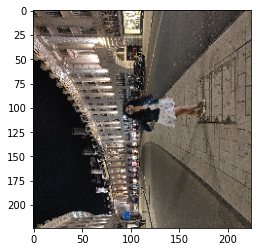

Validating that this is a picture of your car...
Are you sure this is a picture of your car? Please take another picture (try a different angle or lighting) and try again.


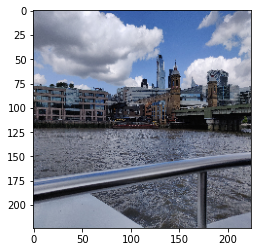

Validating that this is a picture of your car...
Are you sure this is a picture of your car? Please take another picture (try a different angle or lighting) and try again.


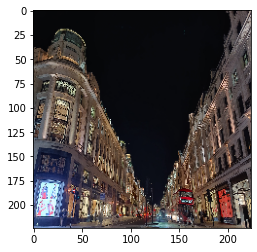

Validating that this is a picture of your car...
('n02930766', 'cab')
Validation complete - proceed to damage evaluation


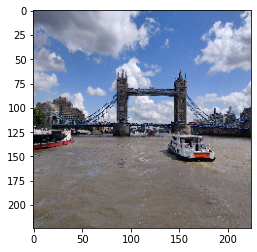

Validating that this is a picture of your car...
Are you sure this is a picture of your car? Please take another picture (try a different angle or lighting) and try again.


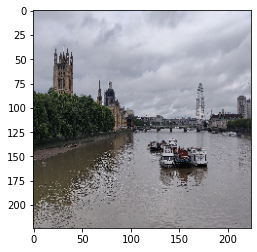

Validating that this is a picture of your car...
Are you sure this is a picture of your car? Please take another picture (try a different angle or lighting) and try again.


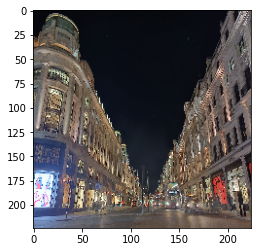

Validating that this is a picture of your car...
('n02930766', 'cab')
Validation complete - proceed to damage evaluation


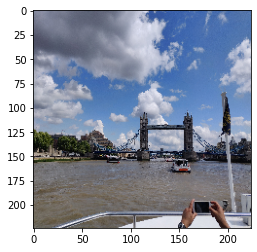

Validating that this is a picture of your car...
Are you sure this is a picture of your car? Please take another picture (try a different angle or lighting) and try again.


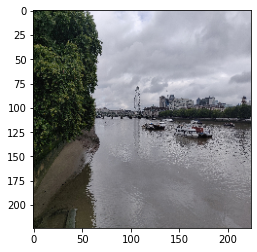

Validating that this is a picture of your car...
Are you sure this is a picture of your car? Please take another picture (try a different angle or lighting) and try again.


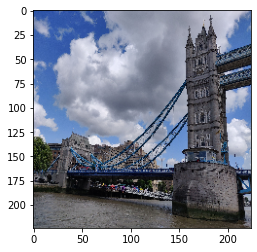

Validating that this is a picture of your car...
Are you sure this is a picture of your car? Please take another picture (try a different angle or lighting) and try again.


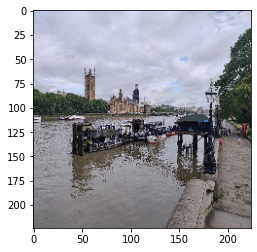

Validating that this is a picture of your car...
Are you sure this is a picture of your car? Please take another picture (try a different angle or lighting) and try again.


In [39]:
for each_not_car_image in test_images_not_car:
    test_non_car_img_path = '/content/drive/My Drive/London All' + '/' + each_not_car_image
    imgtest = load_img(test_non_car_img_path, target_size=(224, 224))
    plt.imshow(imgtest)
    plt.show()
    eval_car_or_not(test_non_car_img_path, model, cat_list)